# Oversampling
A técnica de oversampling SMOTE (Sythetic Minority Oversampling TEchnique) consiste em gerar casos sintéticos para as classes de interesse a partir dos casos já existentes. Os novos casos são gerados na vizinhança de cada caso da classe minoritária com o intuito de se crescer o espaço de decisão desta classe e aumentar o poder de generalização dos classificadores obtidos.

Visualmente, no espaço amostral do conjunto de dados, os novos casos sintéticos são interpolados aleatoriamente ao longo do segmento de reta que une cada caso da classe minoritária a um de seus k vizinhos mais próximos, escolhidos de forma aleatória.



In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import tensorflow as tf
from keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm #barra de progreso`
import cv2
from glob import glob
#para redimencionar
import sklearn
import skimage
from skimage.transform import resize
import random
#Usaremos datetime para nombrar archivos
import datetime
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skimage.color import rgb2gray
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D,AveragePooling2D
from keras.layers.merge import concatenate
#visualizacion modelo
import keras
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from keras import datasets, layers, models, optimizers
from sklearn.utils.multiclass import unique_labels
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D, Flatten, Embedding, Dropout,BatchNormalization

In [ ]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
x_train = drive.CreateFile({'id':"00000000000000000000L"})   #https://drive.google.com/0000000000000000000000000
x_train.GetContentFile('X_BD.npy')        # file name 
y_train = drive.CreateFile({'id':"1SLMheO0z2mCOqTP8GEXuLvZwddsmwQR4"})  # https://drive.google.com/file0000000000000000000000000000000000
y_train.GetContentFile('y_BD.npy')


In [ ]:
X = np.load('X_BD.npy')
y = np.load('y_BD.npy') 

# partition Data to test, train,validation data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3,random_state=10)

In [ ]:
def count_labels(y_all):
    how_many_0 = len(np.where(y==0)[0])
    how_many_1 = len(np.where(y==1)[0])


    print('#NON CANCER:',how_many_0)
    print('#CANCER:',how_many_1)

    return how_many_0,how_many_1

#NON CANCER: 76751
#CANCER: 30861


Text(0.5, 1.0, '(76751, 30861)')

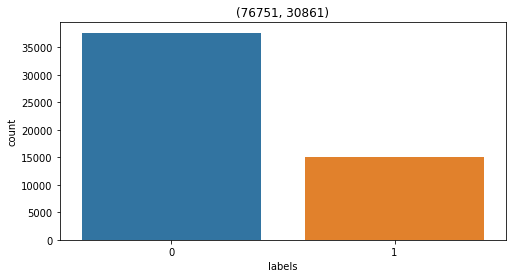

In [ ]:
plt.figure(figsize=(8,4))
map_characters = {0: 'NON CANCER', 1: 'CANCER'}
dict_characters=map_characters
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab).set_title(count_labels(y))

# Técnica exige que dados de input estejam num vetor:

In [ ]:
X_train_vec=[]
#X_trainReshaped = X_train.reshape(len(X_train),200,200)
print(X_train.shape)
for i in X_train:
    img = i
    #print(img.shape)
    cols,colors,dim = img.shape # gives dimensions for RGB array
    img_size = cols*colors*dim
    img_1D_vector = img.reshape(img_size)
    # you can recover the orginal image with:
    img2 = img_1D_vector.reshape(cols,colors,dim)
    X_train_vec.append(img_1D_vector)

(52729, 50, 50, 1)


* Aplicação de método de SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=12,ratio=1.0)
X_train_res, y_train_res = sm. fit_sample(X_train_vec,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def count_labels(y_all):
    how_many_0 = len(np.where(y==0)[0])
    how_many_1 = len(np.where(y==1)[0])


    print('#NON CANCER:',how_many_0)
    print('#CANCER:',how_many_1)

    return how_many_0,how_many_1

#NON CANCER: 76751
#CANCER: 30861


Text(0.5, 1.0, '(76751, 30861)')

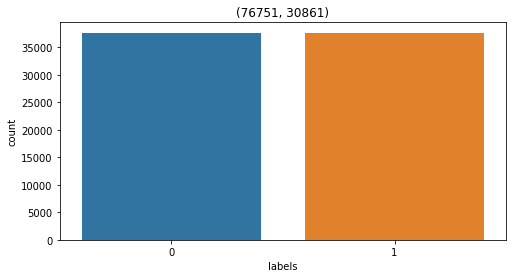

In [ ]:
plt.figure(figsize=(8,4))
map_characters = {0: 'NON CANCER', 1: 'CANCER'}
dict_characters=map_characters
df = pd.DataFrame()
df["labels"]=y_train_res
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab).set_title(count_labels(y_train_res))

* Confirmar nova dimensão dos dados:

* sampling target de dados antes de ovesamping SMOTE

In [ ]:
count_labels(y_train)

#NON CANCER: 76751
#CANCER: 30861


(76751, 30861)

* sampling target de dados depois de ovesamping SMOTE

In [ ]:

count_labels(y_train_res)

#NON CANCER: 76751
#CANCER: 30861


(76751, 30861)